In [2]:

# Aproximacao de periodo de investimento, i sendo o juros ao trimestre (a.t)
# i Taxa de juros simples em decimal
# n Periodo investido (trimestre)
# k Percentual de lucro a mais por juros compostos

import numpy as np
import pandas as pd
import math

vp = float(input("Digite o valor de vp: "))
i = float(input("Digite o valor de i (Juros Simples): "))
n = float(input("Digite o valor de n (Periodo): "))
TMA = float(input("Digite o valor da TMA (%): "))/100

print("\n\n")





Digite o valor de vp: 10000
Digite o valor de i (Juros Simples): 0.05
Digite o valor de n (Periodo): 15
Digite o valor da TMA (%): 40





In [7]:
def Diff_Juros_Simples_Compostos(i,n):
  js = n*i + 1
  jc = ((i+1)**n)
  return jc - js
K = Diff_Juros_Simples_Compostos(i,n)
print(f"Valor % de K calculado para o Periodo ({n}): {K*100}")
print(f"Valor % de lucro total (Simples + Composto) calculado para o Periodo ({n}): {(n*i+K)*100}")
print(f"Valor total acumulado (aproximado): {vp*K+n*i*vp+vp}")
print(f"Rendimento anual: {(K*100/(n/4)) + i*4*100}")
print("\n\n")

k = float(input("Digite o valor % de lucro por reinvestimento (k): "))/100

def Juros_Total(i,k):
  return 1+n*i+k

juros_total = Juros_Total(i,k)
print(f"Calculando Juros total (%) com o valor de k = {k}: {(juros_total-1)*100}")
print(f"Valor de Lucro Juros compostos: {vp*k}")
print(f"Valor de Resgate total (aproximado): {round(vp*juros_total, 2)}")

print("\n\n")

Valor % de K calculado para o Periodo (12.109): 19.99823603621835
Valor % de lucro total (Simples + Composto) calculado para o Periodo (12.109): 80.54323603621836
Valor total acumulado (aproximado): 18054.323603621837
Rendimento anual: 26.6060735110144



Digite o valor % de lucro por reinvestimento (k): 20
Calculando Juros total (%) com o valor de k = 0.2: 80.545
Valor de Lucro Juros compostos: 2000.0
Valor de Resgate total (aproximado): 18054.5





In [4]:
def aproximacaoP1(i,n):
  return round((i+1)**(n) - (n*i +1), 6)

# Versao 1 Amostragem. Calculo de Periodo aproximado para um k.
parte1 = 0
periodo = 0
counter_inter = 0
while (k != parte1):
  periodo += 0.000001
  parte1 = round(aproximacaoP1(i,periodo),6)
  counter_inter += 1
print(f"Calculo da raiz no loop: {parte1}")
print(f"Periodo (n) aproximado para k = {k}: {periodo}")
print(f"Lucro % aproximado juros compostos: {k*100}")
print(f"Numero de interacoes: {counter_inter}")

print("\n\n")
# Versao 2 Metodo Newton-Raphson. Calculo de Periodo aproximado para um k.

def Funcao_juros_Simples_Composto(i,n, k):

  new_var = (i+1)**(n) - ((n)*i + 1) - k
  return new_var

def Derivada_Funcao_juros_Simples_Composto(i,n):

  DerFuncao = (i+1)**(n) * math.log(i+1) - i
  return DerFuncao

def Segunda_Derivada_Funcao_juros_Simples_Composto(i,n):
  DerFuncao = (i+1)**(n) * math.log(i+1)**2
  return DerFuncao



# Teorema de convexidade
funcao_juros_simples_composto_1 = Funcao_juros_Simples_Composto(i, 1, k)

funcao_juros_simples_composto_25 = Funcao_juros_Simples_Composto(i, 25, k)
print(f" Valor da funcao_juros_simples_composto({i}, 1, {k})  {funcao_juros_simples_composto_1}")
print(f" Valor da funcao_juros_simples_composto({i}, 25, {k})  {funcao_juros_simples_composto_25}")
print(f" f(i, a, k)f(i, b, k) < 0 Intervalo [1,25] validacao: {funcao_juros_simples_composto_1*funcao_juros_simples_composto_25}")

print("\n")

derivada_a = Derivada_Funcao_juros_Simples_Composto(i, 1)
derivada_b = Derivada_Funcao_juros_Simples_Composto(i, 25)
validacao_derivada = derivada_a*derivada_b

print(f" f'(i, a)f'(i, b) > 0 para validar que não tem raiz (f'(i, n) = 0) no intervalo [1,25]: {validacao_derivada} ")

derivada2_a = Segunda_Derivada_Funcao_juros_Simples_Composto(i, 1)
derivada2_b = Segunda_Derivada_Funcao_juros_Simples_Composto(i, 25)
validacao_derivada2 = derivada2_a*derivada2_b

print(f" f''(i, a)f''(i, b) > 0 para validar que nao tem troca de sinal em f''(i, n) para todo n em [a,b] no intervalo [1,25]: {validacao_derivada2} ")

print("\n")



# Escolhendo um chute inicial no intervalo [1, 25]

n0 = 5  # Pode ser qualquer valor dentro do intervalo [1, 25]

for j in range(50):

  n0 = n0 - Funcao_juros_Simples_Composto(i,n0,k)/Derivada_Funcao_juros_Simples_Composto(i,n0)


print(f"Periodo (n) aproximado Metodo Newton-Raphson para k = {k} : {n0}")








Calculo da raiz no loop: 0.2
Periodo (n) aproximado para k = 0.2: 12.109449997688804
Lucro % aproximado juros compostos: 20.0
Numero de interacoes: 12109450



 Valor da funcao_juros_simples_composto(0.05, 1, 0.2)  -0.2
 Valor da funcao_juros_simples_composto(0.05, 25, 0.2)  0.9363549408993885
 f(i, a, k)f(i, b, k) < 0 Intervalo [1,25] validacao: -0.18727098817987772


 f'(i, a)f'(i, b) > 0 para validar que não tem raiz (f'(i, n) = 0) no intervalo [1,25]: 0.0001416838517235493 
 f''(i, a)f''(i, b) > 0 para validar que nao tem troca de sinal em f''(i, n) para todo n em [a,b] no intervalo [1,25]: 2.014887921977145e-05 


Periodo (n) aproximado Metodo Newton-Raphson para k = 0.2 : 12.109463124395804


In [5]:
def Calcula_Porc_Juros_Anual(jurosimples,juroscompostos, periodo):

  qtde_ano = periodo/4
  return (juroscompostos/(qtde_ano)) + jurosimples

porc_lucro = Calcula_Porc_Juros_Anual(i*100*4,k*100, n0)
print(f"Porcentagem de rendimento anual % para k = {k*100}%: {porc_lucro}")


Porcentagem de rendimento anual % para k = 20.0%: 26.606403535663894


In [ ]:
# Versao 1 Amostragem. Calculo de periodo aproximado para uma TMA X%.
def calcula_porc_lucro(jurosimples,juroscompostos, periodo):
  return (juroscompostos/(float(periodo)/4)) + jurosimples

def calcula_k(i,n):
  new_var = (i+1)**(n)
  new_var0 = (n)*i + 1
  return new_var-new_var0

parte2 = 0
periodo = 0
PRA = 0
while (True):
  if(PRA >= TMA*100):

    break

  else:

    periodo += 1
    K1 = calcula_k(i,periodo)
    PRA = calcula_porc_lucro(i*100*4,K1*100, periodo)



print(f"Periodo (n): {periodo}")
print(f"Rendimento total (juros composto) %: {K1*100}")
print(f"Porcentagem de rendimento anual: {PRA}")


# Versao 2 Newton-Raphson. Calculo de periodo aproximado para uma TMA X%.
def Funcao_Periodo_para_TMA(i,n, TMA):

  Porcentagem_Lucro = (((i+1)**(n) - ((n)*i + 1))/(n/4))
  Porcentagem_Lucro = Porcentagem_Lucro + (4*i) - (TMA)
  return Porcentagem_Lucro


def Derivada_Funcao_Periodo_para_TMA(i,n):

  numerador = 4*(((((i+1)**n) * math.log(i+1) - i)*n) - (((i+1)**n) - (n*i+1)))
  denominador = n**2
  return numerador / denominador

def Segunda_Derivada_Funcao_Periodo_para_TMA(i,n):

  numerador = 4*((n**2) * ( (((i+1)**n) * math.log(i+1)) - 1 + n*(((i+1)**n) * ((math.log(i+1))**2)) - (((i+1)**n)*(math.log(i+1)) - i) - (2*n*(n*( ((i+1)**n) * (math.log(i+1)) - i))) - (((i+1)**n) - (n*i+1)*1)))
  denominador = n**4
  return numerador / denominador


# Teorema de convexidade

#Chute Inicial [1, 30]

funcao_periodo_tma_1 = Funcao_Periodo_para_TMA(i, 1, TMA)

funcao_periodo_tma_30 = Funcao_Periodo_para_TMA(i, 30, TMA)
print(f" Valor da Funcao_Periodo_para_TMA({i}, 1, {TMA})  {funcao_periodo_tma_1}")
print(f" Valor da Funcao_Periodo_para_TMA({i}, 25, {TMA})  {funcao_periodo_tma_30}")
print(f" f(i, a, k)f(i, b, k) < 0 Intervalo [1,30] validacao: {funcao_periodo_tma_1*funcao_periodo_tma_30}")

print("\n")

derivada_a = Derivada_Funcao_Periodo_para_TMA(i, 1)
derivada_b = Derivada_Funcao_Periodo_para_TMA(i, 25)
validacao_derivada = derivada_a*derivada_b

print(f" f'(i, a)f'(i, b) > 0 para validar que não tem raiz (f'(i, n) = 0) no intervalo [1,30]: {validacao_derivada} ")

derivada2_a = Segunda_Derivada_Funcao_Periodo_para_TMA(i, 1)
derivada2_b = Segunda_Derivada_Funcao_Periodo_para_TMA(i, 25)
validacao_derivada2 = derivada2_a*derivada2_b

print(f" f''(i, a)f''(i, b) > 0 para validar que nao tem troca de sinal em f''(i, n) para todo n em [a,b] no intervalo [1,30]: {validacao_derivada2} ")

print("\n")


p0 = 5
for j in range(50):

  p0 = p0 - Funcao_Periodo_para_TMA(i,p0, TMA) / Derivada_Funcao_Periodo_para_TMA(i,p0)

print(f"Periodo (n) para atingir a TMA {TMA*100}% usando o metodo Newton-Raphson: {p0}")


Periodo (n): 27
Rendimento total (juros composto) %: 138.3456322341576
Porcentagem de rendimento anual: 40.4956492198752
 Valor da Funcao_Periodo_para_TMA(0.05, 1, 0.4)  -0.2
 Valor da Funcao_Periodo_para_TMA(0.05, 25, 0.4)  0.04292565002008902
 f(i, a, k)f(i, b, k) < 0 Intervalo [1,30] validacao: -0.008585130004017805


 f'(i, a)f'(i, b) > 0 para validar que não tem raiz (f'(i, n) = 0) no intervalo [1,30]: 5.4905651475722636e-05 
 f''(i, a)f''(i, b) > 0 para validar que nao tem troca de sinal em f''(i, n) para todo n em [a,b] no intervalo [1,30]: 3.5484016950628785 


Periodo (n) para atingir a TMA 40.0% usando o metodo Newton-Raphson: 26.583448586099987


In [6]:
# Fluxo de Caixa

def juroscompostos(i,n):
    return ((i+1)**(n))

def jurossimples(i,n):
    return i*n

# Recoleta de parâmetros
vp = float(input("Digite o valor de vp: "))
i = float(input("Digite o valor de i: "))
n = float(input("Digite o valor de n: "))

# Cálculo dos componentes
kc = juroscompostos(i,n)
ks = jurossimples(i,n)
kc = kc-ks
k = kc+ks

print(f"Valor de Kc calculado: {kc}")
print(f"Valor de Ks calculado: {ks}")
print(f"Valor de K (Simples + Composto) calculado: {k}")
print(f"Valor de vp*k: {vp*k}")

# Geração do fluxo de caixa
print("\n\nFluxo de caixa:")
qtde_fluxo = int(input("Digite quanto tempo de fluxo de caixa: "))

# Inicialização de listas
trimestres = []
valores_acumulados = []
juros_simples_lista = []
juros_compostos_lista = []
retorno_anual_lista = []

n_periodo = 0
while (n_periodo <= qtde_fluxo):
    kc = juroscompostos(i, n_periodo)
    ks = jurossimples(i, n_periodo)
    kc_puro = kc - ks
    k_total = kc_puro + ks

    valor_acumulado = k_total * vp

    # Cálculo do retorno anual
    if n_periodo > 0:
        retorno_anual = ((kc - 1) / (n_periodo/4)) * 100
    else:
        retorno_anual = 0

    # Armazenamento
    trimestres.append(n_periodo)
    valores_acumulados.append(valor_acumulado)
    juros_simples_lista.append(ks * vp)
    juros_compostos_lista.append(kc_puro * vp)
    retorno_anual_lista.append(retorno_anual)

    print(f"{n_periodo}º Trimestre: {valor_acumulado:.2f}")
    n_periodo += 1

Digite o valor de vp: 10000
Digite o valor de i: 0.05
Digite o valor de n: 12.109
Valor de Kc calculado: 1.1999823603621835
Valor de Ks calculado: 0.60545
Valor de K (Simples + Composto) calculado: 1.8054323603621836
Valor de vp*k: 18054.323603621837


Fluxo de caixa:
Digite quanto tempo de fluxo de caixa: 20
0º Trimestre: 10000.00
1º Trimestre: 10500.00
2º Trimestre: 11025.00
3º Trimestre: 11576.25
4º Trimestre: 12155.06
5º Trimestre: 12762.82
6º Trimestre: 13400.96
7º Trimestre: 14071.00
8º Trimestre: 14774.55
9º Trimestre: 15513.28
10º Trimestre: 16288.95
11º Trimestre: 17103.39
12º Trimestre: 17958.56
13º Trimestre: 18856.49
14º Trimestre: 19799.32
15º Trimestre: 20789.28
16º Trimestre: 21828.75
17º Trimestre: 22920.18
18º Trimestre: 24066.19
19º Trimestre: 25269.50
20º Trimestre: 26532.98


Gráficos gerados e salvos com sucesso!


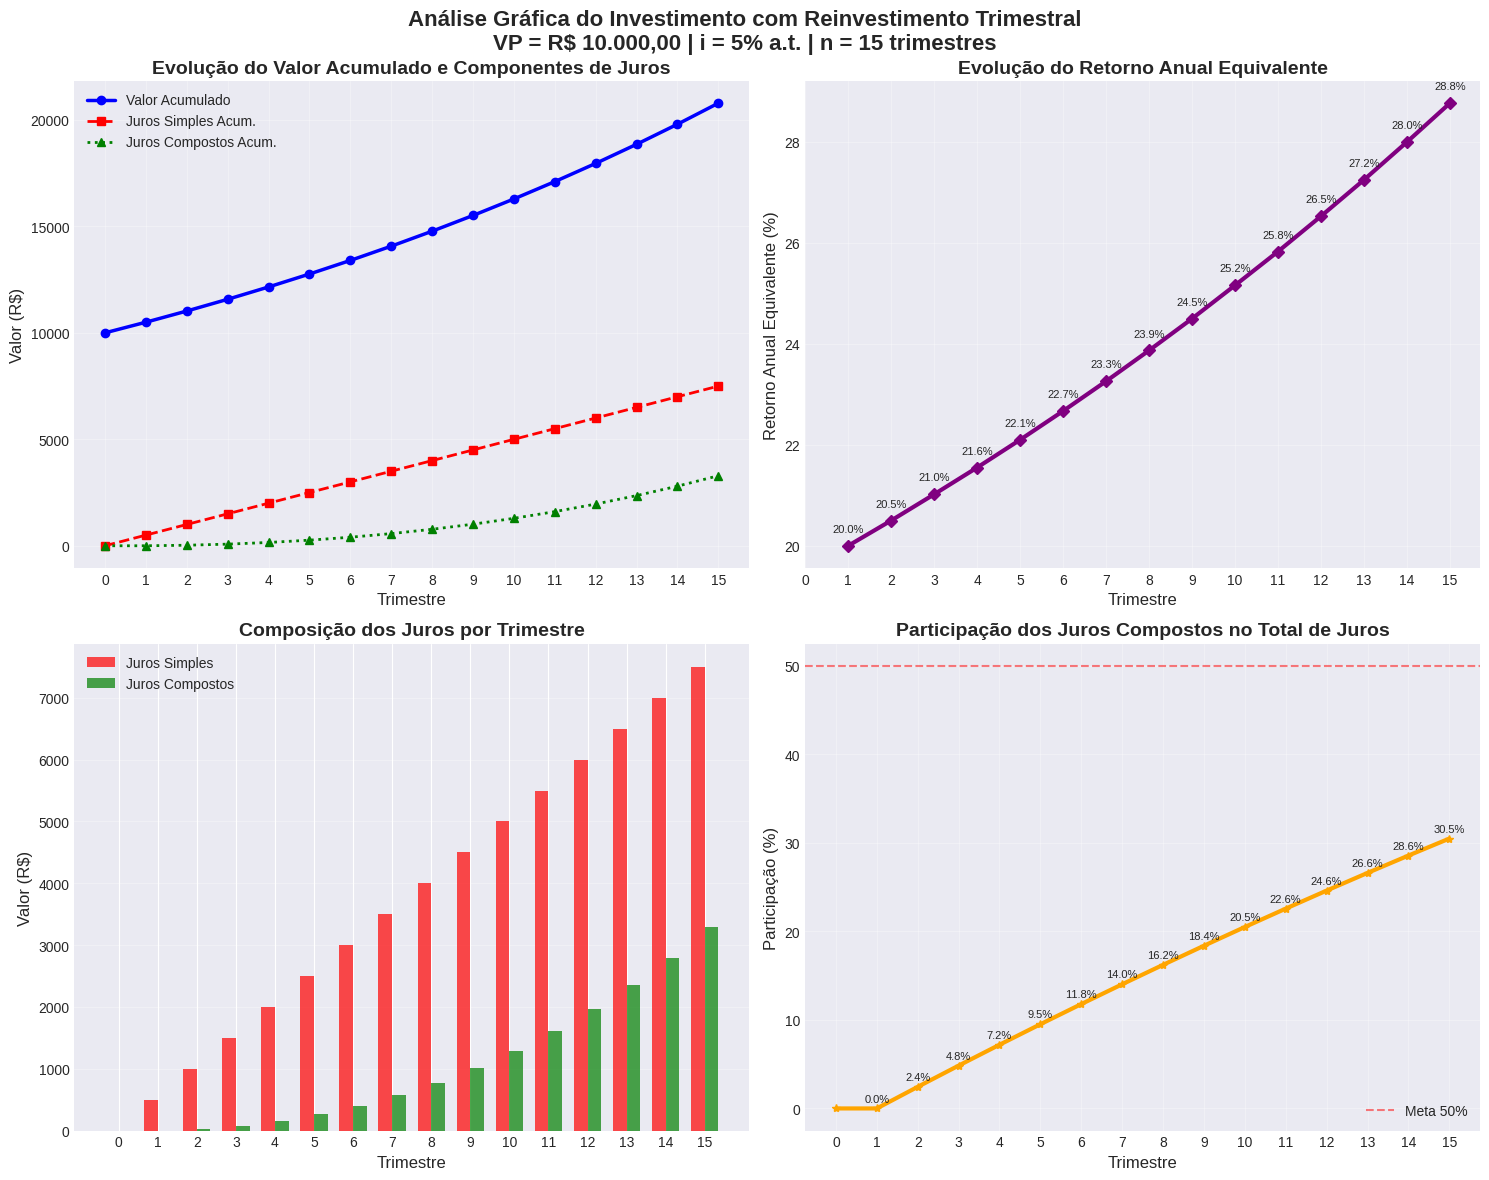

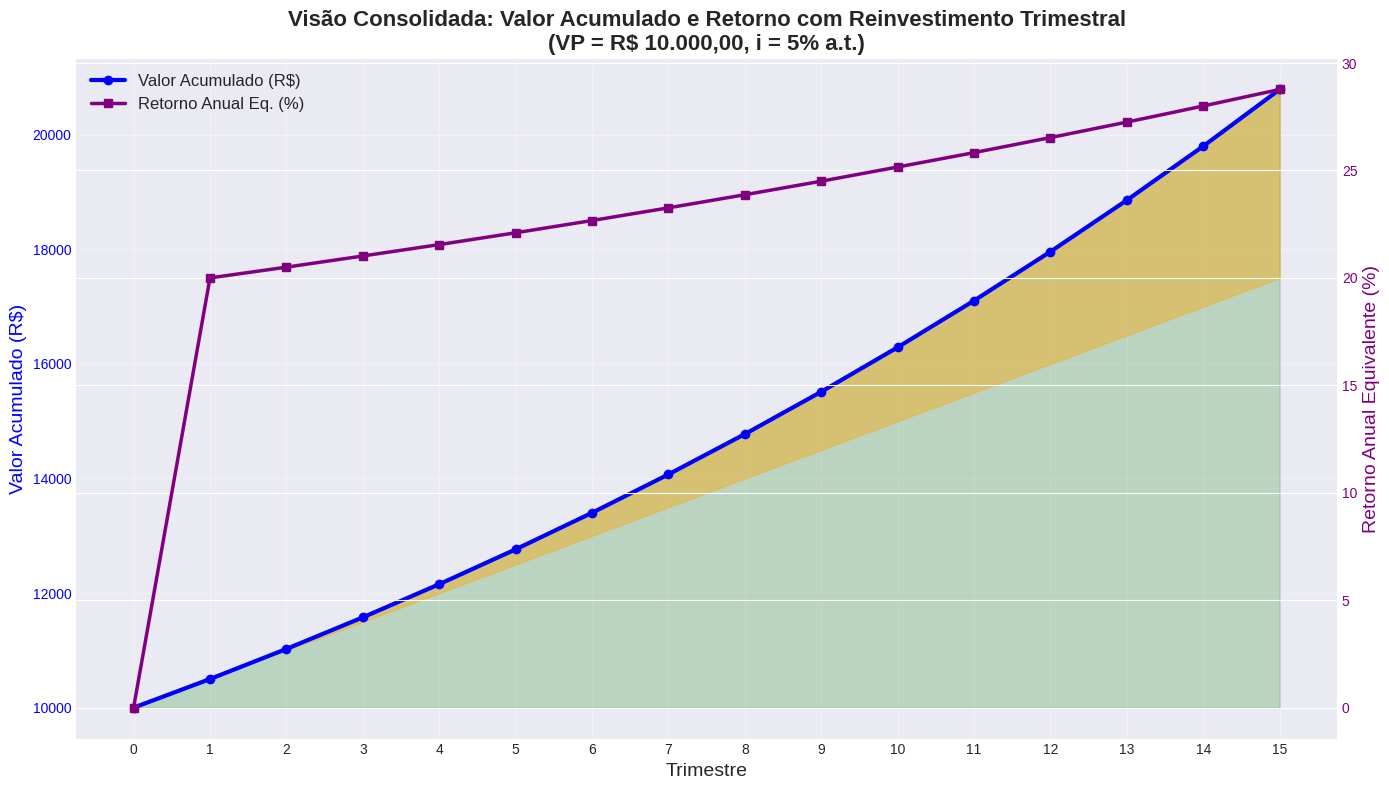

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dados da simulação
trimestres = list(range(0, 16))
valor_acumulado = [10000, 10500, 11025, 11576.25, 12155.06, 12762.82,
                   13400.96, 14071, 14774.55, 15513.28, 16288.95,
                   17103.39, 17958.56, 18856.49, 19799.32, 20789.28]
juros_simples = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000,
                 4500, 5000, 5500, 6000, 6500, 7000, 7500]
juros_compostos = [0, 0, 25, 76.25, 155.06, 262.82, 400.96, 571,
                   774.55, 1013.28, 1288.95, 1603.39, 1958.56,
                   2356.49, 2799.32, 3289.28]
retorno_anual = [0, 20, 20.5, 21.02, 21.55, 22.10, 22.67, 23.26,
                 23.87, 24.50, 25.16, 25.83, 26.53, 27.25, 28.00, 28.77]

# Cálculo da participação percentual
participacao_compostos = []
for i in range(len(trimestres)):
    if (juros_simples[i] + juros_compostos[i]) > 0:
        participacao = (juros_compostos[i] / (juros_simples[i] + juros_compostos[i])) * 100
    else:
        participacao = 0
    participacao_compostos.append(participacao)

# Configuração do estilo
plt.style.use('seaborn-v0_8-darkgrid')
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análise Gráfica do Investimento com Reinvestimento Trimestral\nVP = R$ 10.000,00 | i = 5% a.t. | n = 15 trimestres',
             fontsize=16, fontweight='bold')

# Gráfico 1: Evolução do valor acumulado
axs[0, 0].plot(trimestres, valor_acumulado, 'b-', linewidth=2.5, marker='o', label='Valor Acumulado')
axs[0, 0].plot(trimestres, juros_simples, 'r--', linewidth=2, marker='s', label='Juros Simples Acum.')
axs[0, 0].plot(trimestres, juros_compostos, 'g:', linewidth=2, marker='^', label='Juros Compostos Acum.')
axs[0, 0].set_xlabel('Trimestre', fontsize=12)
axs[0, 0].set_ylabel('Valor (R$)', fontsize=12)
axs[0, 0].set_title('Evolução do Valor Acumulado e Componentes de Juros', fontsize=14, fontweight='bold')
axs[0, 0].legend(loc='upper left', fontsize=10)
axs[0, 0].grid(True, alpha=0.3)
axs[0, 0].set_xticks(trimestres)

# Gráfico 2: Retorno anual equivalente
axs[0, 1].plot(trimestres[1:], retorno_anual[1:], 'purple', linewidth=3, marker='D')
axs[0, 1].set_xlabel('Trimestre', fontsize=12)
axs[0, 1].set_ylabel('Retorno Anual Equivalente (%)', fontsize=12)
axs[0, 1].set_title('Evolução do Retorno Anual Equivalente', fontsize=14, fontweight='bold')
axs[0, 1].grid(True, alpha=0.3)
axs[0, 1].set_xticks(trimestres)
for i, txt in enumerate(retorno_anual):
    if i > 0:
        axs[0, 1].annotate(f'{txt:.1f}%', (trimestres[i], retorno_anual[i]),
                          textcoords="offset points", xytext=(0,10),
                          ha='center', fontsize=8)

# Gráfico 3: Composição percentual dos juros
bar_width = 0.35
x_indices = np.arange(len(trimestres))
axs[1, 0].bar(x_indices - bar_width/2, juros_simples, bar_width,
              label='Juros Simples', color='red', alpha=0.7)
axs[1, 0].bar(x_indices + bar_width/2, juros_compostos, bar_width,
              label='Juros Compostos', color='green', alpha=0.7)
axs[1, 0].set_xlabel('Trimestre', fontsize=12)
axs[1, 0].set_ylabel('Valor (R$)', fontsize=12)
axs[1, 0].set_title('Composição dos Juros por Trimestre', fontsize=14, fontweight='bold')
axs[1, 0].legend(loc='upper left', fontsize=10)
axs[1, 0].grid(True, alpha=0.3, axis='y')
axs[1, 0].set_xticks(x_indices)
axs[1, 0].set_xticklabels(trimestres)

# Gráfico 4: Participação percentual dos juros compostos
axs[1, 1].plot(trimestres, participacao_compostos, 'orange', linewidth=3, marker='*')
axs[1, 1].set_xlabel('Trimestre', fontsize=12)
axs[1, 1].set_ylabel('Participação (%)', fontsize=12)
axs[1, 1].set_title('Participação dos Juros Compostos no Total de Juros', fontsize=14, fontweight='bold')
axs[1, 1].grid(True, alpha=0.3)
axs[1, 1].set_xticks(trimestres)
axs[1, 1].axhline(y=50, color='r', linestyle='--', alpha=0.5, label='Meta 50%')
axs[1, 1].legend(loc='lower right', fontsize=10)
for i, txt in enumerate(participacao_compostos):
    if i > 0:
        axs[1, 1].annotate(f'{txt:.1f}%', (trimestres[i], participacao_compostos[i]),
                          textcoords="offset points", xytext=(0,5),
                          ha='center', fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.92)

# Gráfico adicional: Visão consolidada
fig2, ax2 = plt.subplots(figsize=(14, 8))
ax2.set_xlabel('Trimestre', fontsize=14)
ax2.set_ylabel('Valor Acumulado (R$)', color='blue', fontsize=14)
line1 = ax2.plot(trimestres, valor_acumulado, 'b-', linewidth=3, marker='o',
                 label='Valor Acumulado (R$)')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_xticks(trimestres)
ax2.grid(True, alpha=0.3)

ax2b = ax2.twinx()
ax2b.set_ylabel('Retorno Anual Equivalente (%)', color='purple', fontsize=14)
line2 = ax2b.plot(trimestres, retorno_anual, 'purple', linewidth=2.5, marker='s',
                  label='Retorno Anual Eq. (%)')
ax2b.tick_params(axis='y', labelcolor='purple')

ax2.fill_between(trimestres, 10000, valor_acumulado, alpha=0.2, color='green',
                 label='Juros Totais')
ax2.fill_between(trimestres, [10000 + js for js in juros_simples], valor_acumulado,
                 alpha=0.4, color='orange', label='Juros Compostos')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc='upper left', fontsize=12)

plt.title('Visão Consolidada: Valor Acumulado e Retorno com Reinvestimento Trimestral\n(VP = R$ 10.000,00, i = 5% a.t.)',
          fontsize=16, fontweight='bold')
plt.tight_layout()

# Salvar figuras
fig.savefig('analise_investimento_4graficos.png', dpi=300, bbox_inches='tight')
fig2.savefig('visao_consolidada_investimento.png', dpi=300, bbox_inches='tight')

print("Gráficos gerados e salvos com sucesso!")
plt.show()